In [341]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [342]:
df = pd.read_csv('data/BlackFriday.csv')

In [343]:
# Explore data

In [344]:
df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [346]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [347]:
print("Product amount: ", len(df["Product_ID"].value_counts()))

Product amount:  3623


In [348]:
# Variable analysis

In [349]:
# Gender
df["Gender"].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [350]:
# Occupation
df["Occupation"].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [351]:
# City Category
df["City_Category"].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [352]:
# Stay In Current City Years
df["Stay_In_Current_City_Years"].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

In [353]:
# Marital Status
df["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

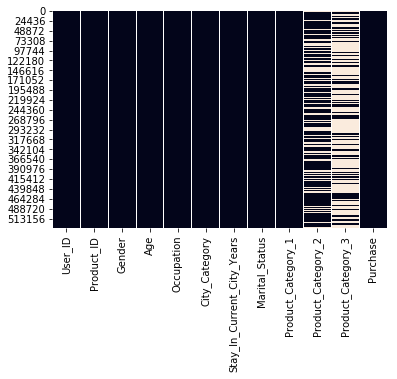

In [354]:
# Product Category (view null values)
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

In [355]:
# Transform categorical to numerical data

In [356]:
df['Age'] = df['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})
df['Gender'] = df['Gender'].map({'M':0,'F':1})
df['City_Category'] = df['City_Category'].map({'A':0,'B':1,'C':2})
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4})

In [357]:
# Clean null values (these are transformed to zero) and cast to int64

In [358]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)
df["Product_Category_2"] = df["Product_Category_2"].astype(np.int64)
df["Product_Category_3"] = df["Product_Category_3"].astype(np.int64)

In [359]:
# Check new variable types

In [360]:
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(11), object(1)
memory usage: 49.2+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,1,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,1,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,1,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,0,6,16,2,4,0,8,0,0,7969
5,1000003,P00193542,0,2,15,0,3,0,1,2,0,15227
6,1000004,P00184942,0,4,7,1,2,1,1,8,17,19215
7,1000004,P00346142,0,4,7,1,2,1,1,15,0,15854
8,1000004,P0097242,0,4,7,1,2,1,1,16,0,15686
9,1000005,P00274942,0,2,20,0,1,1,8,0,0,7871


In [398]:
df = df.drop(["Product_ID"], axis=1)

In [399]:
# Create training and testing vars (~20% test)

In [400]:
from sklearn.model_selection import train_test_split
target = df["Purchase"]
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)
# train, test = train_test_split(dfCopy, test_size=0.2)

In [401]:
print("Train set length: ", len(train))
print("Test set length: ", len(test))

Train set length:  430061
Test set length:  107516


In [402]:
# Cross Validation

In [403]:
# PCA for dimensionality reduction 

In [404]:
from sklearn.decomposition import PCA
pc = PCA(4) # number of components wanted
principalComponents = pc.fit_transform(dfCopy)

In [405]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["component 1", "component 2", "component 3", "component 4"])

In [406]:
from sklearn.model_selection import KFold
kf = KFold(20)

In [412]:
# fit a model
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [413]:
model.score(X_test, y_test)

1.0